# Week 2a: Working with data

Great job in learning the basics of programming; now we're ready to play with EEG data! Today we will try and load data from a pre-existing file, and we will try to graph the data. Ready?

In [1]:
%load_ext autoreload
%autoreload 2

import csv
import matplotlib.pyplot as plt # So that I don't have to write matplotlib.pyplot.func() every time :D
import numpy as np # Same thing as ^

The simplest way to save data in Python is using CSV files! CSV, or Comma Separated Values, are essentially text documents that look like this:

```
col_1, col_2, col_3
1.0, 2.0, 3.0
3.1, 4.1, 5.9
```

Note how each row is a new line in the CSV, and columns are represented by commas!

Let's try to read some data from a CSV! Here, we have EEG data from the frontal lobe of a person blinking using the Muse headband. Try printing the data :)

In [ ]:
# Open the file
with open('/content/stare_blink.csv') as csvfile:
    reader = csv.DictReader(csvfile) # Reader to read from CSV
    
    # Read each row
    for row in reader:  
        # Try printing the data here! What type is row?
        print(row)

# New Section

Note that each row is a **dictionary**, where the *key* is the column name from line 1. You can access a particular cell in a row like this:

```
row['l_ear']
```

Try to save the data into 4 lists, and print out your lists. Did it work?

```
l_ear_arr
l_forehead_arr
r_forehead_arr
r_ear_arr
```

In [12]:
# Saving Muse EEG values in list: one for each electrode
# Values saved should be FLOATS: aka decimal numbers
l_ear_arr = []
l_forehead_arr = []
r_forehead_arr = []
r_ear_arr = []

# Open file, read data, and store floats in lists
with open('/content/stare_blink.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        l_ear = float(row['l_ear']) # row['l_ear'] is a STRING, so need to convert to FLOAT
        l_forehead = float(row['l_forehead'])
        r_forehead = float(row['r_forehead'])
        r_ear = float(row['r_ear'])
        
        l_ear_arr.append(l_ear)
        l_forehead_arr.append(l_forehead)
        r_forehead_arr.append(r_forehead)
        r_ear_arr.append(r_ear)

Now it's time to see what the data looks like! We will use *matplotlib* to graph our data.

We imported *matplotlib* as *plt* in the beginning of this notebook! It has a function called

`plt.plot(values_list)`

,where values is the list you want to plot. Try plotting the EEG values from the left ear!

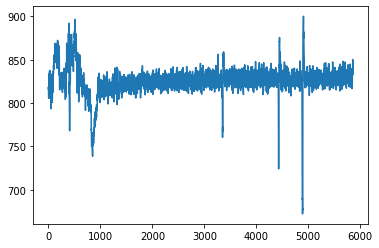

In [13]:
plt.plot(l_ear_arr)

That graph looks really tiny :( ... let's try and make it a bit bigger! You can set the dimensions with the following function:

```
plt.rcParams['figure.figsize'] = [*width*, *height*]
```

After you set the dimensions, you can try plotting again! Once you get the graph on Jupyter, double-click it to make it full-sized.

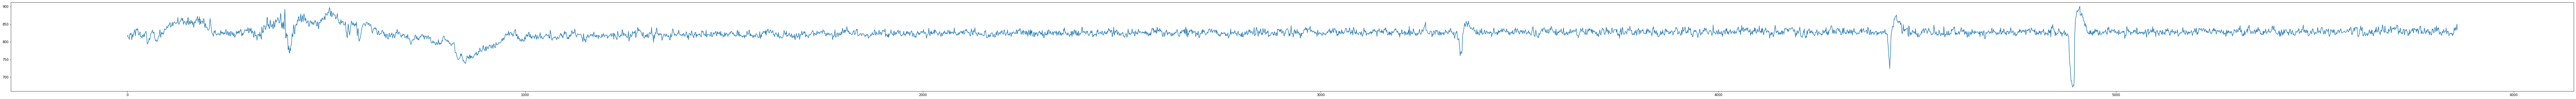

In [14]:
plt.rcParams['figure.figsize'] = [140, 5]
plt.plot(l_ear_arr)

Right now, we're only graphing the EEG data from the left ear. But what if we want to see the data from all the electrodes? You'll often want to do this to see how the data changes with respect to all the electrodes.

In the example above, we graphed one ***plot*** in the ***figure***. You can use ***subplots*** to plot multiple *plots* in the same *figure*!

First, you'll need to get the figure like this:

```
fig = plt.figure()
```

Now, you can add your axes for each graph! The graphs will be stacked on top of each other, so you have to set their coordinates to specify where they'll be placed. The bottom of the canvas is 0, and the top is 1. You can do that like this:

```
ax_1 = fig.add_axes([ *left coord*, *bottom coord*, *width*, *height*]) # These values are floats in 0.0->1.0
```

All you have to do now is graph! Instead of getting the *figure* to graph, you will graph directly onto the *plot axes*, like this:

```
ax_1.plot(*data_list*)
```

Try it yourself! Graph data from all four electrodes below :) Try comparing the voltage values you get across electrodes ... what do you observe?

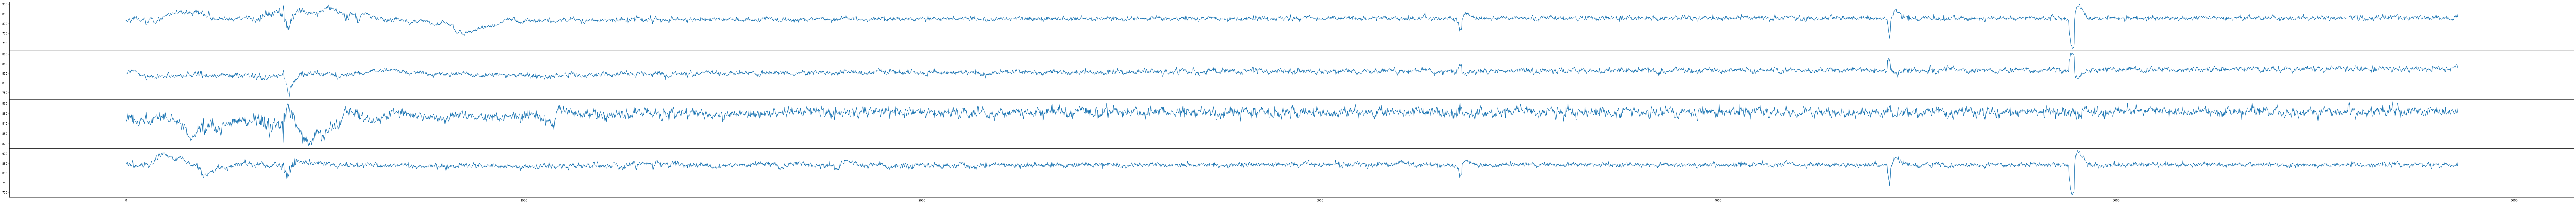

In [15]:
plt.rcParams['figure.figsize'] = [140, 12]

fig = plt.figure()

l_ear_ax =      fig.add_axes([0.1, 0.7, 0.9, 0.2])
l_forehead_ax = fig.add_axes([0.1, 0.5, 0.9, 0.2])
r_forehead_ax = fig.add_axes([0.1, 0.3, 0.9, 0.2])
r_ear_ax =      fig.add_axes([0.1, 0.1, 0.9, 0.2])

l_ear_ax.plot(l_ear_arr)
l_forehead_ax.plot(l_forehead_arr)
r_forehead_ax.plot(r_forehead_arr)
r_ear_ax.plot(r_ear_arr)

fig.show()

Do you notice something weird about the x-axis? What does it currently represent?

Right now, the x axis is indexing *sample number*, but that's not that useful to us! This data was collected over a period of time ... so it probably makes more sense to have ***seconds*** as the unit for the x-axis.

Note that we didn't even pass in any x-axis data to the plots! *plt.plot()* made an assumption that the x-axis values would look like this:

```
[0, 1, 2, 3, 4, 5, 6, ...]
```

We can instead manually pass in our own x-axis values like this:

```
plt.plot(*x-axis data*, *y-axis data*) # Both items passed in are lists
```

Try it yourself! Create x-axis values ***that represent what time the voltage value in the y-axis array was collected***. The first value will have been collected at time 0s, and samples are collected 256 times per second. Also try to *make the x-axis ticks at intervals of 1 second*; use Google for this task!

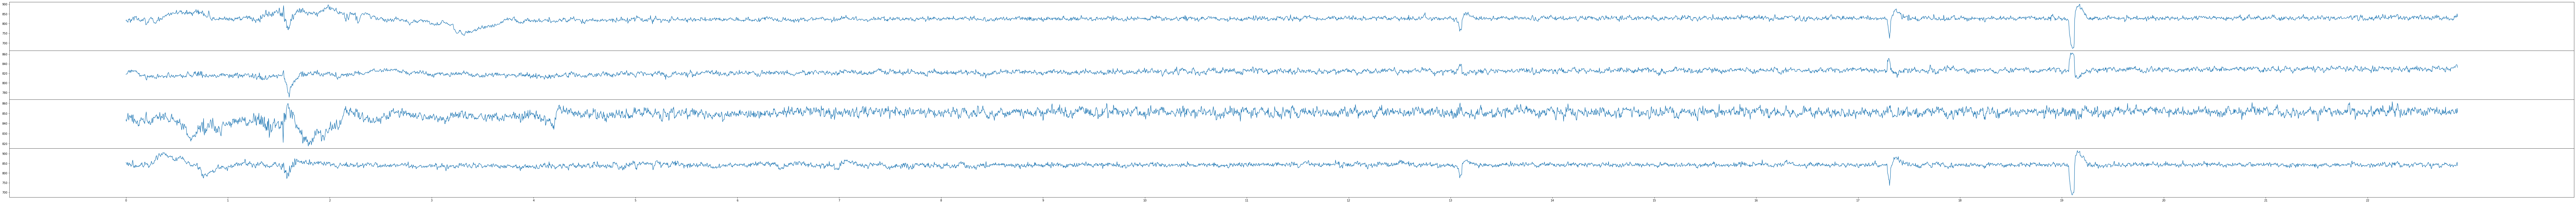

In [16]:
t = [i / 256.0 for i in range(0, len(l_ear_arr))]

plt.rcParams['figure.figsize'] = [140, 12]

fig = plt.figure()

l_ear_ax =      fig.add_axes([0.1, 0.7, 0.9, 0.2])
l_forehead_ax = fig.add_axes([0.1, 0.5, 0.9, 0.2])
r_forehead_ax = fig.add_axes([0.1, 0.3, 0.9, 0.2])
r_ear_ax =      fig.add_axes([0.1, 0.1, 0.9, 0.2])

l_ear_ax.plot(t, l_ear_arr)
l_forehead_ax.plot(t, l_forehead_arr)
r_forehead_ax.plot(t, r_forehead_arr)
r_ear_ax.plot(t, r_ear_arr)

plt.xticks(np.arange(t[0], t[-1], 1.0))

fig.show()

These graphs are looking pretty nice! Let's add a splash of colour by plotting like this:

```
ax_1.plot(t, y_data, color='#000000') # You can choose whatever colour you want! Here it's in HEX format
```

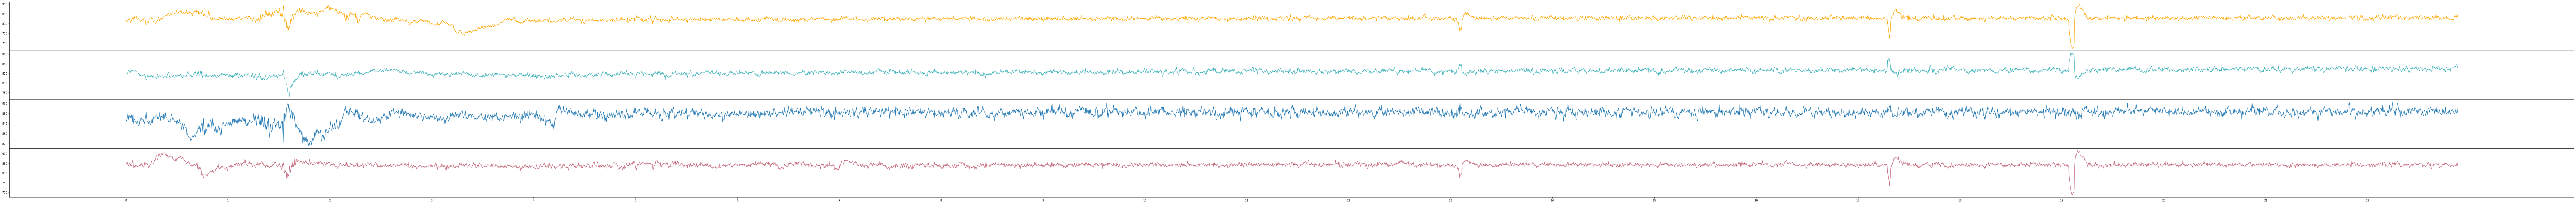

In [17]:
t = [i / 256.0 for i in range(0, len(l_ear_arr))]

plt.rcParams['figure.figsize'] = [140, 12]

fig = plt.figure()

l_ear_ax =      fig.add_axes([0.1, 0.7, 0.9, 0.2])
l_forehead_ax = fig.add_axes([0.1, 0.5, 0.9, 0.2])
r_forehead_ax = fig.add_axes([0.1, 0.3, 0.9, 0.2])
r_ear_ax =      fig.add_axes([0.1, 0.1, 0.9, 0.2])

l_ear_ax.plot(t, l_ear_arr, color='#FFA500')
l_forehead_ax.plot(t, l_forehead_arr, color='#3CB2BA')
r_forehead_ax.plot(t, r_forehead_arr)
r_ear_ax.plot(t, r_ear_arr, color='#C46679')

plt.xticks(np.arange(t[0], t[-1], 1.0))

fig.show()

Notice that the signal looks really noisy! This is because there are many sources of noise that affect the EEG reading we collected, from our skin not being a good conductor to the electric fields of literally every electrical appliance in the room! In a bit, we'll try to clean up the data. But for now ... ***awesome job on parsing your first CSV file and making your first graphs!***